In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- definicija funkcije ---
x = sp.symbols('x')
f = x**3-x-2
df = sp.diff(f, x)

In [3]:
# numeričke funkcije
f_num = sp.lambdify(x, f, modules='numpy')
df_num = sp.lambdify(x, df, modules='numpy')

In [4]:
# početna točka i broj aproksimacija
x0 = 1
n = 3  # prve 3 aproksimacije

In [5]:
#lista aproksimacija
aprox = [x0]

In [6]:
# iteracije Newtonove metode
for k in range(n):
    x_nk= aprox[-1] - f_num(aprox[-1]) / df_num(aprox[-1])
    aprox.append(x_nk)

In [7]:
# graf
x_min = min(aprox) - 0.5
x_max = max(aprox) + 0.5
x_vals = np.linspace(x_min, x_max, 400)
y_vals = f_num(x_vals)

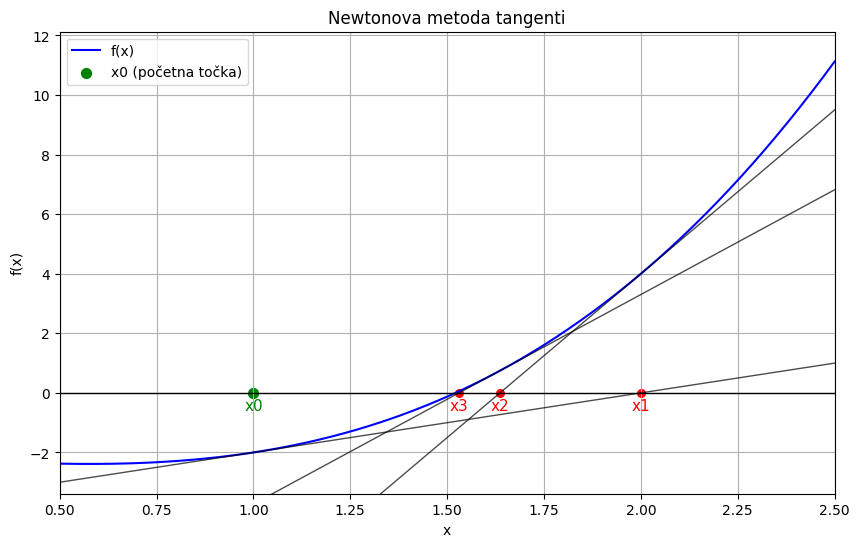

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')

# tangenta
for i in range(n):
    xk = aprox[i]
    yk = f_num(xk)
    slope = df_num(xk)

    # crtanje tangente
    X = np.linspace(x_min, x_max, 400)
    Y = slope*(X - xk) + yk
    plt.plot(X, Y, color='black', linewidth=1, alpha=0.7)

    # crtanje aproksimacija
    x_nk = aprox[i+1]
    plt.scatter(x_nk, 0, color='red', s=30)
    plt.text(x_nk, -0.6, f'x{i+1}', color='red', fontsize=11, ha='center')

    # crtanje početne aproksimacije
plt.scatter(x0, 0, color='green', s=50, label='x0 (početna točka)')
plt.text(x0, -0.6, 'x0', color='green', fontsize=11, ha='center')

plt.axhline(0, color='black', linewidth=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newtonova metoda tangenti')
plt.legend()
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(min(y_vals)-1, max(y_vals)+1)
plt.show()